In [4]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import statannot
from statannot import add_stat_annotation
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
# set rcParams to be able to easily edit text in illustrator
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'  
plt.rcParams['font.sans-serif'] = ['Arial']  

## Get data

In [6]:
df_M0 = pd.read_excel('/Users/hannalemmik/Dropbox/C3ar1_longitudinal_MRI_paper_2025/data/KO_validation_C3ar1_M0.xlsx')
df_M2 = pd.read_excel('/Users/hannalemmik/Dropbox/C3ar1_longitudinal_MRI_paper_2025/data/KO_validation_C3ar1_M2.xlsx')
df_M0vsM2 = pd.read_excel('/Users/hannalemmik/Dropbox/C3ar1_longitudinal_MRI_paper_2025/data/KO_validation_C3ar1_M0vsM2.xlsx')
df_Arg_Cd206 = pd.read_excel('/Users/hannalemmik/Dropbox/C3ar1_longitudinal_MRI_paper_2025/data/KO_validation_Arg_Cd206.xlsx')

In [7]:
df_M0.head(1)

,Genotype,Polarisation,ID,C3ar1,Hprt,C3ar_substract_ref,C3ar_choose_control_to_relate_everything_to,C3ar_substract_that_control,C3ar_2^-x
0,WT,M0,611a,15.348702,22.910664,-7.561962,12.467857,-20.029819,1070474.57


## Arg and Cd206 expression in M0 vs M2 macrophages

In [8]:
#to long form
long_both = pd.melt(df_Arg_Cd206, id_vars=['ID', 'Genotype', 'Polarisation'],
                       value_vars=['Arg_2^-x', 'Cd206_2^-x'],
                       var_name='type', value_name='value')
long_both.head(2)

,ID,Genotype,Polarisation,type,value
0,611a,WT,M2,Arg_2^-x,71166.082755
1,611a,WT,M0,Arg_2^-x,1.000000


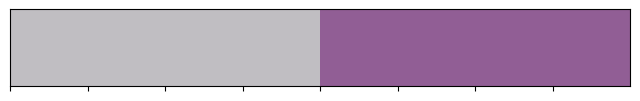

In [9]:
# define custom colors for groups of categories
id_palette = {}
id_palette.update(dict.fromkeys(["611a", "56.1e", "561d", "561c"], "#c0bec2"))
id_palette.update(dict.fromkeys(["561b", "581a", "611c", "571a"], "#915e95"))
# for each group id in the dictionary, get its assigned color
sns_palette = sns.color_palette([id_palette[group] for group in id_palette])

# test the palette 
sns.palplot(sns_palette)


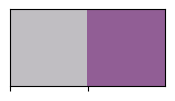

In [10]:
# custom color palette
custom_palette = {"WT": "#c0bec2", "HOM": "#915e95"}
group_palette = sns.color_palette([custom_palette[group] for group in custom_palette])

# test the palette
sns.palplot(group_palette)

/var/folders/r9/_1bw8v7j4dqb79r_rydnls7c0000gn/T/ipykernel_42490/3524987849.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arg['log_value'] = np.log10(arg['value'])


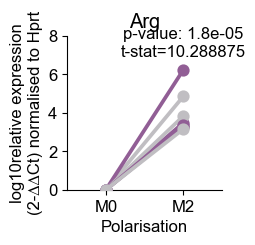

In [11]:
# filter data for Arg
arg = long_both[long_both['type'] == 'Arg_2^-x']
# log transform the 'value' column
arg['log_value'] = np.log10(arg['value'])
# separate data for M2 polarization
m2_data = arg[arg['Polarisation'] == 'M2']['log_value']
# perform one-sample t-test against 0
t_stat, p_val = stats.ttest_1samp(m2_data, 0)



# plotting
f, ax = plt.subplots(figsize=(2, 2))

order=['M0', 'M2']

sns.pointplot(x='Polarisation', y='log_value', hue='ID',palette=id_palette, data=arg, order=order, scale=1, join=True, ax=ax, capsize=0.2, errwidth=3, errorbar=('ci', 95))
# annotate
ax.text(1, max(arg['log_value']) + 0.7, f'  \np-value: {p_val.round(6)}\nt-stat={t_stat.round(6)}', ha='center')
ax.set_title('Arg')
ax.set_ylabel('log10relative expression\n(2-∆∆Ct) normalised to Hprt')
ax.set_ylim(0,8)
ax.legend_.remove()
sns.despine()

plt.savefig('/Users/hannalemmik/Dropbox/KO_paper/validation/Arg_M0vsM2.pdf', dpi=300)

/var/folders/r9/_1bw8v7j4dqb79r_rydnls7c0000gn/T/ipykernel_42490/66246969.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arg['log_value'] = np.log10(arg['value'])


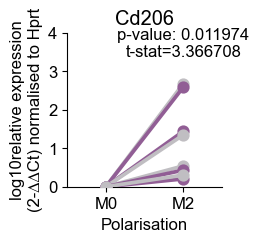

In [12]:
# filter data
arg = long_both[long_both['type'] == 'Cd206_2^-x']
# log transform the 'value' column
arg['log_value'] = np.log10(arg['value'])
# separate data for M2 polarisation
m2_data = arg[arg['Polarisation'] == 'M2']['log_value']
# perform one-sample t-test against 0
t_stat, p_val = stats.ttest_1samp(m2_data, 0)



# plotting
f, ax = plt.subplots(figsize=(2, 2))

order=['M0', 'M2']

sns.pointplot(x='Polarisation', y='log_value', hue='ID',palette=id_palette, data=arg, order=order, scale=1, join=True, ax=ax, capsize=0.2, errwidth=3, errorbar=('ci', 95))
# annotate the plot with the p-value
ax.text(1, max(arg['log_value']) + 0.7, f'  \np-value: {p_val.round(6)}\nt-stat={t_stat.round(6)}', ha='center')
ax.set_ylabel('log10relative expression\n(2-∆∆Ct) normalised to Hprt')
ax.set_title('Cd206')
ax.set_ylim(0,4)
ax.legend_.remove()
sns.despine()


plt.savefig('/Users/hannalemmik/Dropbox/KO_paper/validation/cd206_M0vsM2.pdf', dpi=300)

## Compare C3ar1 expression in M0 vs M2 macrophages

In [13]:
df_M0vsM2.head(1)

,Genotype,Polarisation,ID,C3ar_substract_ref,C3ar_choose_control_to_relate_everything_to,C3ar_substract_that_control,C3ar_2^-x
0,WT,M2,611a,-9.569118,-7.561962,-2.007155,4.019888


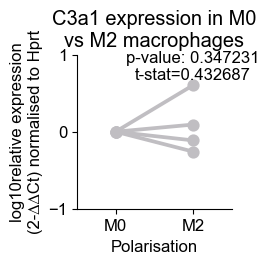

In [14]:
# log transform the 'value' column
df_M0vsM2['log_value'] = np.log10(df_M0vsM2['C3ar_2^-x'])
# separate data
m0_data = df_M0vsM2[df_M0vsM2['Polarisation'] == 'M0']['log_value']
m2_data = df_M0vsM2[df_M0vsM2['Polarisation'] == 'M2']['log_value']
# perform one-sample t-test; do M2 macrophages express more C3ar1?
t_stat, p_val = stats.ttest_1samp(m2_data, 0, alternative='greater')


# plotting
f, ax = plt.subplots(figsize=(2, 2))

order=['M0', 'M2']
gray_palette = sns.color_palette(["#c0bec2", "#c0bec2", "#c0bec2"])
sns.pointplot(x='Polarisation', y='log_value', hue='ID',palette=gray_palette, data=df_M0vsM2, order=order, scale=1, join=True, ax=ax, capsize=0.2, errwidth=3, errorbar=('ci', 95))
# annotate the plot
ax.text(1, max(df_M0vsM2['log_value']) + 0.07, f'  \np-value: {p_val.round(6)}\nt-stat={t_stat.round(6)}', ha='center')
ax.set_ylabel('log10relative expression\n(2-∆∆Ct) normalised to Hprt')
ax.set_title('C3a1 expression in M0\nvs M2 macrophages')
ax.set_ylim(-1,1)
ax.set_yticks([-1, 0, 1])
ax.legend_.remove()
sns.despine()

plt.savefig('/Users/hannalemmik/Dropbox/KO_paper/validation/C3ar1_M0vsM2.pdf', dpi=300)

## C3ar1 expression in M2 macrophages

In [15]:
df_M2.head(1)

,Genotype,Polarisation,ID,C3ar1,Hprt,C3ar_substract_ref,C3ar_choose_control_to_relate_everything_to,C3ar_substract_that_control,C3ar_2^-x
0,WT,M2,611a,16.5988,26.167917,-9.569118,12.278937,-21.848055,3.775025e+06


/var/folders/r9/_1bw8v7j4dqb79r_rydnls7c0000gn/T/ipykernel_42490/1396505085.py:19: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Genotype', y='log_value', data=df_M2, order=order, palette=group_palette, size=8, alpha=0.6, jitter=0.25, ax=ax)
/opt/anaconda3/envs/python3119/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/python3119/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/python3119/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you w

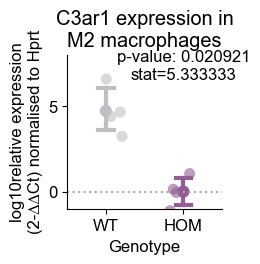

In [31]:
# log transform the 'value' column
df_M2['log_value'] = np.log10(df_M2['C3ar_2^-x'])

# separate data for wildtype
wt_data = df_M2[df_M2['Genotype'] == 'WT']['log_value']
# separate data for homozygous
hom_data = df_M2[df_M2['Genotype'] == 'HOM']['log_value']

# perform kruskal wallis test
stat, p_val = stats.kruskal(wt_data, hom_data)

# create the plot
f, ax = plt.subplots(figsize=(2, 2))

# choose order for groups
order = ['WT', 'HOM']

# plot individual data points with stripplot
sns.stripplot(x='Genotype', y='log_value', data=df_M2, order=order, palette=group_palette, size=8, alpha=0.6, jitter=0.25, ax=ax)

# plot the pointplot on top
sns.pointplot(x='Genotype', y='log_value', palette=group_palette, data=df_M2, order=order, scale=1, join=True, ax=ax, capsize=0.2, errwidth=3, errorbar=('ci', 95))

# show kruskal wallis results as annotation
ax.text(1, max(df_M2['log_value']), f'  \np-value: {p_val.round(6)}\nstat={stat.round(6)}', ha='center')

# set axis labels and limits
ax.set_title('C3ar1 expression in\nM2 macrophages')
ax.set_ylim(-1, 8)
ax.set_ylabel('log10relative expression\n(2-∆∆Ct) normalised to Hprt')

# remove top and right axes
sns.despine()

# set y axis ticks to relevant values
ax.set_yticks([0, 5])

# draw horizontal line at y=0 for better reference
plt.axhline(y=0, linestyle=":", color='darkgray')

# export the figure as pdf
plt.savefig('/Users/hannalemmik/Dropbox/KO_paper/validation/C3ar1_M2.pdf', dpi=300)


## Calculate effect size

In [24]:
# calculate epsilon-squared (ε²) for effect size
n = len(wt_data) + len(hom_data)
epsilon_squared = stat / (n - 1)
epsilon_squared

0.7619047619047612

## C3ar1 expression in M0 macrophages

In [32]:
df_M0.head(1)

,Genotype,Polarisation,ID,C3ar1,Hprt,C3ar_substract_ref,C3ar_choose_control_to_relate_everything_to,C3ar_substract_that_control,C3ar_2^-x
0,WT,M0,611a,15.348702,22.910664,-7.561962,12.467857,-20.029819,1070474.57


/var/folders/r9/_1bw8v7j4dqb79r_rydnls7c0000gn/T/ipykernel_42490/3651663225.py:18: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Genotype', y='log_value', data=df_M0, order=order, palette=group_palette, size=8, alpha=0.6, jitter=0.25, ax=ax)
/opt/anaconda3/envs/python3119/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/python3119/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/python3119/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you w

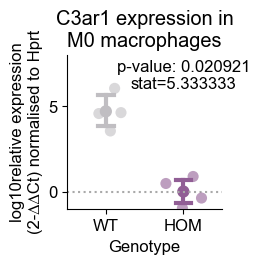

In [35]:
# log transform the 'value' column
df_M0['log_value'] = np.log10(df_M0['C3ar_2^-x'])
# separate data
wt_data = df_M0[df_M0['Genotype'] == 'WT']['log_value']
# separate data 
hom_data = df_M0[df_M0['Genotype'] == 'HOM']['log_value']
# kruskal wallis test
stat, p_val = stats.kruskal(wt_data, hom_data)



# plotting
f, ax = plt.subplots(figsize=(2, 2))

order=['WT', 'HOM']

# plot individual data points with stripplot
sns.stripplot(x='Genotype', y='log_value', data=df_M0, order=order, palette=group_palette, size=8, alpha=0.6, jitter=0.25, ax=ax)
sns.pointplot(x='Genotype', y='log_value', palette=group_palette, data=df_M0, order=order, scale=1, join=True, ax=ax, capsize=0.2, errwidth=3, errorbar=('ci', 95))
# annotate 
ax.text(1, max(df_M0['log_value']) , f'  \np-value: {p_val.round(6)}\nstat={stat.round(6)}', ha='center')

ax.set_title('C3ar1 expression in\nM0 macrophages')
ax.set_ylim(-1,8)
ax.set_ylabel('log10relative expression\n(2-∆∆Ct) normalised to Hprt')
sns.despine()
ax.set_yticks([0, 5])
plt.axhline(y=0, linestyle=":", color='darkgray')

plt.savefig('/Users/hannalemmik/Dropbox/KO_paper/validation/C3ar1_M0.pdf', dpi=300)

## Calculate effect size

In [47]:
# calculate epsilon-squared (ε²) for effect size
n = len(wt_data) + len(hom_data)
epsilon_squared = stat / (n - 1)
epsilon_squared

0.7619047619047612